In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

iris = datasets.load_iris()

features, target = iris.data, iris.target

decisiontree = DecisionTreeClassifier(random_state=0)

model = decisiontree.fit(features, target)

In [2]:
observation = [[5, 4, 3, 2]]

model.predict(observation)

array([1])

In [3]:
model.predict_proba(observation)

array([[0., 1., 0.]])

In [4]:
from sklearn.tree import DecisionTreeRegressor

boston = datasets.load_boston()

features, target = boston.data[:, 0:2], boston.target

decisiontree = DecisionTreeRegressor(random_state=0)

model = decisiontree.fit(features, target)

In [5]:
observation = [[0.02, 16]]

model.predict(observation)

array([33.])

In [7]:
!pip install pydotplus

     |████████████████████████████████| 278 kB 658 kB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=4fee70ed6dbefddafa1b6ab9f6c05ed16e29ab042a5f6ab25d3dd66460aed058
  Stored in directory: /Users/mattmastin/Library/Caches/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus
You should consider upgrading via the '/Users/mattmastin/.pyenv/versions/3.7.4/bin/python3.7 -m pip install --upgrade pip' command.


In [4]:
# visualizing a decision tree

import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image
from sklearn import tree

iris = datasets.load_iris()
features, target = iris.data, iris.target

decisiontree = DecisionTreeClassifier

model = decisiontree.fit(features, target)

dot_data = tree.export_graphviz(decisiontree,
                               out_file=None,
                               features_names=iris.feature_names,
                               class_names=iris.target_names)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

iris = datasets.load_iris()
features, target = iris.data, iris.target

randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

model = randomforest.fit(features, target)

In [6]:
observation = [[5, 4, 3, 2]]
model.predict(observation)


array([1])

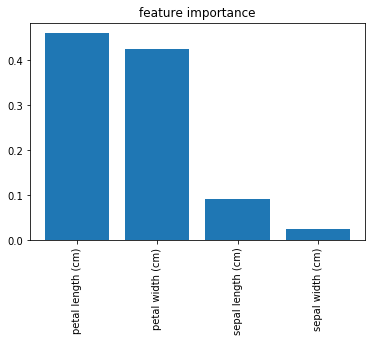

In [7]:
# identifying import features in random forests

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

model = randomforest.fit(features, target)

importances = model.feature_importances_

indices = np.argsort(importances)[::-1]

names = [iris.feature_names[i] for i in indices]

plt.figure()
plt.title('feature importance')
plt.bar(range(features.shape[1]), importances[indices])
plt.xticks(range(features.shape[1]), names, rotation=90)
plt.show();

In [8]:
model.feature_importances_

array([0.09090795, 0.02453104, 0.46044474, 0.42411627])

In [9]:
# selecting feature importances
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(randomforest, threshold=0.3)

features_important = selector.fit_transform(features, target)

model = randomforest.fit(features_important, target)

In [11]:
model.feature_importances_

array([0.51108238, 0.48891762])

In [12]:
# handling imbalanced classes

# make classes highly imbalanced by removing first 40 observations
features = features[40:, :]
target = target[40:]

target = np.where((target == 0), 0, 1)
randomforest = RandomForestClassifier(
    random_state=0, n_jobs=-1, class_weight='balanced')

model = randomforest.fit(features, target)

In [14]:
# controlling tree size
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier(random_state=0,
                                     max_depth=None,
                                     min_samples_split=2,
                                     min_samples_leaf=1,
                                     min_weight_fraction_leaf=0,
                                     max_leaf_nodes=None,
                                     min_impurity_decrease=0)

model = decisiontree.fit(features, target)

In [16]:
# improving performance through boosting

from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(random_state=0)

model = adaboost.fit(features, target)